In [19]:
!pip install cmake dlib face_recognition numpy opencv-python

In [0]:
import cv2

In [21]:
from google.colab import drive
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [22]:
%cd /gdrive/My Drive/Face_detection

/gdrive/My Drive/Face_detection


In [23]:
%ls

faces/  test2.jpg  test3.jpg  test4.jpg  test5.jpg  test.jpg


In [0]:
import face_recognition as fr
import os
import shutil
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
def get_encoded_faces():
    
    encoded = {}

    for dirpath, dnames, fnames in os.walk("./faces"):
        for f in fnames:
            if f.endswith(".jpg") or f.endswith(".png"):
                face = fr.load_image_file("faces/" + f)
                encoding = fr.face_encodings(face)[0]
                encoded[f.split(".")[0]] = encoding

    return encoded

In [0]:
x=get_encoded_faces()

In [75]:
x

{'anushka': array([-0.16505854,  0.05584882,  0.10000043, -0.07809535, -0.14476103,
        -0.0521108 , -0.07805255, -0.10788885,  0.18880919, -0.16597499,
         0.16014452, -0.10832913, -0.30615059,  0.10281141, -0.06058579,
         0.20699406, -0.11208836, -0.17157906, -0.16661341, -0.05929971,
         0.00423836,  0.04033821,  0.02988878,  0.15256397, -0.12438098,
        -0.39587459, -0.08265068, -0.08650909, -0.09431069, -0.06344899,
         0.01446158,  0.07134895, -0.18059833, -0.07394061,  0.06987666,
         0.12130109,  0.03367244, -0.07919538,  0.23144917, -0.07087427,
        -0.31264007, -0.07632439,  0.20291622,  0.24283892,  0.14545095,
         0.03699739,  0.02571356, -0.07782415,  0.10589118, -0.27856138,
         0.12777627,  0.13566647,  0.15154594,  0.09322483,  0.15208435,
        -0.17139375,  0.07318396,  0.15575911, -0.15009338,  0.04027949,
         0.12783325, -0.02949898,  0.03766555, -0.04106782,  0.29671305,
         0.1205005 , -0.13122386, -0.134

In [76]:
type(x)

dict

In [0]:
def classify_face(im):
    
    faces = get_encoded_faces()
    faces_encoded = list(faces.values())
    known_face_names = list(faces.keys())

    img = cv2.imread(im)
    face_locations = fr.face_locations(img)
    unknown_face_encodings = fr.face_encodings(img, face_locations)

    face_names = []
    for face_encoding in unknown_face_encodings:
        # See if the face is a match for the known face(s)
        matches = fr.compare_faces(faces_encoded, face_encoding)
        name = "Unknown"

        # use the known face with the smallest distance to the new face
        face_distances = fr.face_distance(faces_encoded, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        face_names.append(name)

        for (top, right, bottom, left), name in zip(face_locations, face_names):
            # Draw a box around the face
            cv2.rectangle(img, (left-20, top-20), (right+20, bottom+20), (255, 0, 0), 2)

            # Draw a label with a name below the face
            #cv2.rectangle(img, (left-20, bottom -1), (right+20, bottom+20), (255, 0, 0), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(img, name, (left -20, bottom + 15), font, 0.4, (0, 255, 0), 1)


    # Display the resulting image
    while True:

        cv2_imshow(img)
        return face_names 

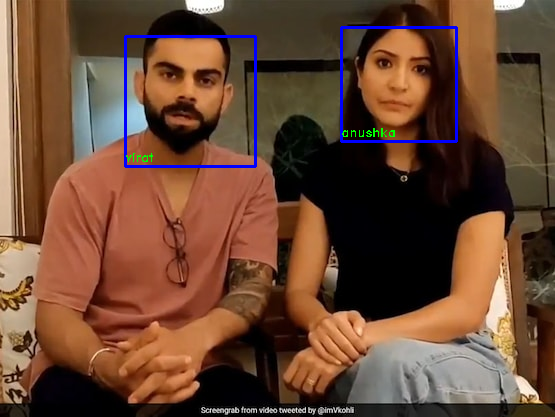

['anushka', 'virat']

In [78]:
classify_face('test7.jpg')